In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import pyccl 

import fastpt as fpt
from fastpt import FASTPT
#from scipy.special import legendre
from scipy.signal import fftconvolve as convolve
import scipy
from scipy import signal

from math import log
from math import exp


In [2]:
#cosmo_fid = pyccl.Cosmology(Omega_c=0.2126, Omega_b=0.03964, h=H0/100, n_s=1.021, sigma8=0.836)
H0 = 67.66
cosmo = pyccl.Cosmology(Omega_c=0.27, Omega_b=0.039, h=H0/100, sigma8=0.8, n_s=0.96) #Planck-2018 Cosmology
def P_m_lin_fid(k, z):
    return .6766**(-3) * np.vectorize(pyccl.linear_matter_power)(cosmo, k/.6766, 1./(1.+z))

K = np.logspace(np.log10(.0001), np.log10(100), 1000)
P_m_lin_fid_array = P_m_lin_fid(K, 0.)

In [ ]:
Pk_array = np.stack([K, P_m_lin_fid_array], axis=1)
np.savetxt("Pk_lin.txt", Pk_array)

In [ ]:
#load the data
d=np.loadtxt('Pk_lin.txt') 
# declare k and the power spectrum
k=d[:,0]; P=d[:,1]
 
C_window=.75
n_pad=int(0.5*len(k))
to_do=['all']


In [5]:
pt1=time()
fpt=FASTPT(k,to_do=to_do,low_extrap=-5,high_extrap=3,n_pad=n_pad)
t2=time()
#
P_spt=fpt.one_loop_dd(P,C_window=C_window)
P_IA_mix=fpt.IA_mix(P,C_window=C_window)
P_IA_ta=fpt.IA_ta(P,C_window=C_window)
P_IA_tt=fpt.IA_tt(P,C_window=C_window)
P_IA_nlb_ta=fpt.nl_bias_ta(P,C_window=C_window)
P_IA_nlb=fpt.IA_nl_bias(P,C_window=C_window)
sig2=fpt.sig2
sig4=fpt.sig4

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_26631/360151702.py:8: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(k,(P+P_spt[0]),'k', label='$P_{\delta}$' )


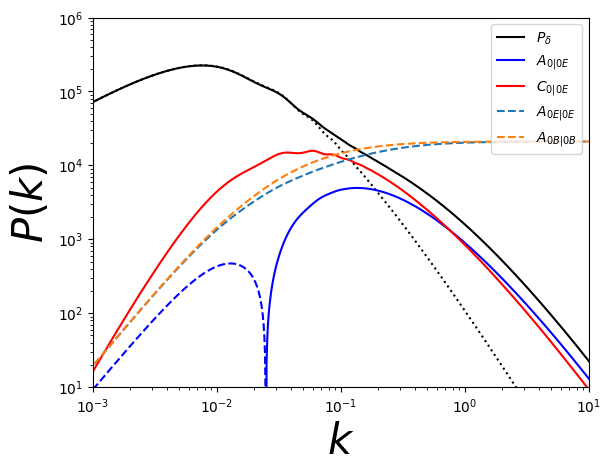

In [6]:
ax=plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$P(k)$', size=30)
ax.set_xlabel(r'$k$', size=30)

ax.plot(k,P,'k:')
ax.plot(k,(P+P_spt[0]),'k', label='$P_{\delta}$' )
ax.plot(k,(P_IA_ta[0]),'b',label='$A_{0|0E}$')
ax.plot(k,-1*(P_IA_ta[0]),'b--')
ax.plot(k,P_IA_ta[1],'r',label='$C_{0|0E}$')
ax.plot(k,-1*(P_IA_ta[2]-(8/15)*sig4),'--',label='$A_{0E|0E}$')
ax.plot(k,-1*(P_IA_ta[3]-(8/15)*sig4),'--',label='$A_{0B|0B}$')

plt.xlim(0.001,10)
plt.ylim(10,1000000)
plt.legend(loc=1)
#plt.grid()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_26631/3910789970.py:8: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(k,P+P_spt[0],'k', label='$P_{\delta}$' )


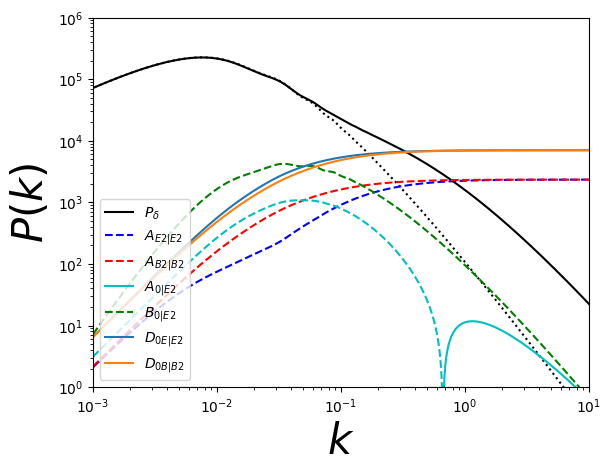

In [7]:
ax=plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$P(k)$', size=30)
ax.set_xlabel(r'$k$', size=30)

ax.plot(k,P,'k:')
ax.plot(k,P+P_spt[0],'k', label='$P_{\delta}$' )
ax.plot(k,-1*(P_IA_tt[0]-(8/135)*sig4),'b--',label='$A_{E2|E2}$')
ax.plot(k,-1*(P_IA_tt[1]-(8/135)*sig4),'r--',label='$A_{B2|B2}$')
ax.plot(k,1*(P_IA_mix[0]), 'c-', label='$A_{0|E2}$')
ax.plot(k,-1*(P_IA_mix[0]), 'c--')
ax.plot(k,-1*(P_IA_mix[1]), 'g--', label='$B_{0|E2}$')
ax.plot(k,-1*(P_IA_mix[2]-(8/45)*sig4), label='$D_{0E|E2}$')
ax.plot(k,-1*(P_IA_mix[3]-(8/45)*sig4), label='$D_{0B|B2}$')
plt.legend(loc=3)
#plt.grid()

plt.xlim(0.001,10)
plt.ylim(1,1000000)
plt.show()


In [10]:
P_delta = P + P_spt[0]

P_d00E = P_0_0E = P_IA_ta[0] + P_IA_ta[1]
P_d2E = P_00_E = P_IA_nlb_ta[0]
P_d20E = P_00_0E = P_IA_nlb[0]
P_d0E2 = P_0_E2 = P_IA_mix[0]+P_IA_mix[1]
P_d2E2 = P_00_E2 = P_IA_nlb[4]

A_SS_E = P_IA_nlb[2]
B_SS_E = P_IA_nlb[1]
P_s2E = P_SS_E = A_SS_E + B_SS_E

P_s20E = P_SS_0E = P_IA_nlb[3]
P_s2E2 = P_SS_E2 = P_IA_nlb[5]


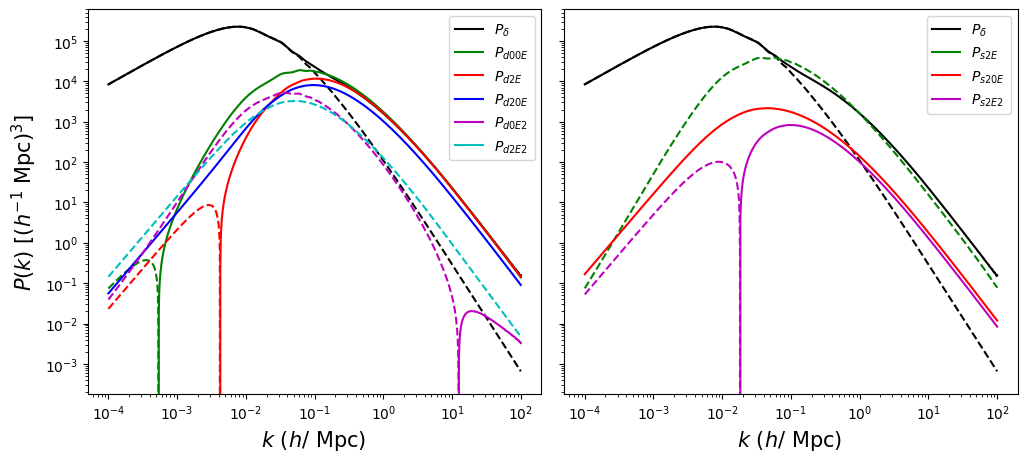

In [14]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5),
                       gridspec_kw={'hspace': 0.2, 'wspace': .05, 'height_ratios': [2.5]}) 
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel(r'$P(k)\ [(h^{-1}\ \mathrm{Mpc})^{3}]$', size=15)
ax[0].set_xlabel(r'$k\ (h/\ \mathrm{Mpc})$ ', size=15)
ax[1].set_xlabel(r'$k\ (h/\ \mathrm{Mpc})$ ', size=15)

ax[0].plot(k, P_delta,'k', label=r'$P_{\delta}$')
ax[0].plot(k, P,'k--')
ax[0].plot(k, P_d00E,'g',label=r'$P_{d00E}$')
ax[0].plot(k,-P_d00E,'--g')
ax[0].plot(k, P_d2E,'r',label=r'$P_{d2E}$')
ax[0].plot(k,-P_d2E,'r--')
ax[0].plot(k, P_d20E,'b',label=r'$P_{d20E}$')
ax[0].plot(k, P_d0E2,'m',label=r'$P_{d0E2}$')
ax[0].plot(k,-P_d0E2,'m--')
ax[0].plot(k, P_d2E2,'c',label=r'$P_{d2E2}$')
ax[0].plot(k,-P_d2E2,'c--')
ax[0].legend()

ax[1].plot(k, P_delta,'k', label=r'$P_{\delta}$')
ax[1].plot(k, P,'k--')
ax[1].plot(k, P_s2E,'g',label=r'$P_{s2E}$')
ax[1].plot(k,-P_s2E,'g--')
ax[1].plot(k, P_s20E,'r',label=r'$P_{s20E}$')
ax[1].plot(k,-P_s20E,'r--')
ax[1].plot(k, P_s2E2,'m', label=r'$P_{s2E2}$')
ax[1].plot(k,-P_s2E2,'m--')
ax[1].legend()

# plt.savefig('P_gI_fastpt.pdf')

In [ ]:
from scipy import interpolate
#Interpolating the powerspectrum components as a function of k;  
P_delta = interpolate.interp1d(k, P_delta, bounds_error=False, fill_value=0)
P_0_0E = interpolate.interp1d(k, P_0_0E, bounds_error=False, fill_value=0)
P_00_E = interpolate.interp1d(k, P_00_E, bounds_error=False, fill_value=0)
P_00_0E = interpolate.interp1d(k, P_00_0E, bounds_error=False, fill_value=0)
P_SS_E = interpolate.interp1d(k, P_SS_E, bounds_error=False, fill_value=0)
P_SS_0E = interpolate.interp1d(k, P_SS_0E, bounds_error=False, fill_value=0)
P_0_E2 = interpolate.interp1d(k, P_0_E2, bounds_error=False, fill_value=0)
P_00_E2 = interpolate.interp1d(k, P_00_E2, bounds_error=False, fill_value=0)
P_SS_E2 = interpolate.interp1d(k, P_SS_E2, bounds_error=False, fill_value=0)
# P_0E_0E = interpolate.interp1d(k, P_0E_0E, bounds_error=False, fill_value=0)
# P_E2_E2 = interpolate.interp1d(k, P_E2_E2, bounds_error=False, fill_value=0)
# P_0E_E2 = interpolate.interp1d(k, P_0E_E2, bounds_error=False, fill_value=0)
#Now, we can use those individual terms as a function of k, i.e. P(k)

In [17]:

cosmo = pyccl.Cosmology(Omega_c=0.27, Omega_b=0.03, h=0.719, sigma8=0.8, n_s=0.96)
# Parameters
C1ρcrit = 0.014 
Ωm = .3111 #from planck 2018 results
z0 = 0.3

# IA strength parameters (for mixed model of galaxies)
#A1 = 2.66 
#A2 = -2.94 

A1 = 1.00
A2 = -1.00 

A1_NLA = 1.0 
#A2 = -1.36 

# η parameters (free)  
η1 = 1
η2 = 1

b_ta = 1

#galaxy bias parameters (b1 and b2 are free)
b1 = 2
b2 = 0.9*(b1-1)**2-0.5 #(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture
bs = (-4/7)*(b1-1)
b3nl = (b1-1)

#Growth factor 
def G(z):
    return pyccl.background.growth_factor(cosmo, 1./(1+z))

#Defining the parameters as a function of z
def C1(z):
    return -A1*(C1ρcrit)*Ωm*(1.+z)**(η1)*(1.+z0)**(-η1)/G(z)
def C1_NLA(z):
    return -A1_NLA*(C1ρcrit)*Ωm*(1.+z)**(η1)*(1.+z0)**(-η1)/G(z)
def C1δ(z):
    return b_ta*C1(z)
def C2(z):
    return 5*A2*(C1ρcrit)*Ωm*(1+z)**(η2)*(1+z0)**(-η2)/G(z)**2
def C2δ(z):
    return b_ta*C2(z)



In [ ]:
#Defining P_GI & P_gI
def P_GI(k, z):
    return  C1(z)*P_delta(k) + C1δ(z)*P_0_0E(k) + C2(z)* P_0_E2(k)

def P_GI_NLA(k, z):
    return  C1_NLA(z)*P_delta(k) 

def P_gI(k, z):
    return  b1*C1(z)*P_delta(k) + b1*C1δ(z)*P_0_0E(k) + \
            0.5*b2*C1(z)*P_00_E(k) + 0.5*b2*C1δ(z)*P_00_0E(k) + 0.5*bs*C1δ(z)*(P_SS_E(k)+P_SS_0E(k)) + \
            b1*C2(z)*P_0_E2(k) + 0.5*b2*C2(z)*P_00_E2(k) + 0.5*bs*C2δ(z)*P_SS_E2(k) 
def P_gI_NLA(k, z):
    return  b1*C1_NLA(z)*P_delta(k) + 0.5*b2*C1_NLA(z)*P_00_E(k) 
    # return  b1*C1_NLA(z)*P_delta(k) 

# def P_II(k, z):
#     return  C1(z)**2*P_delta(k) + 2*C1(z)*C1δ(z)*P_0_0E(k) + C1δ(z)**2*P_0E_0E(k) +\
#             C2(z)**2*P_E2_E2(k) + 2*C1(z)*C2(z)*P_0_E2(k) + 2*C2(z)*C1δ(z)*P_0E_E2(k)
# def P_II_NLA(k, z):
#     return  C1_NLA(z)**2*P_delta(k) 

/tmp/ipykernel_26631/2978345884.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
/tmp/ipykernel_26631/2978345884.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


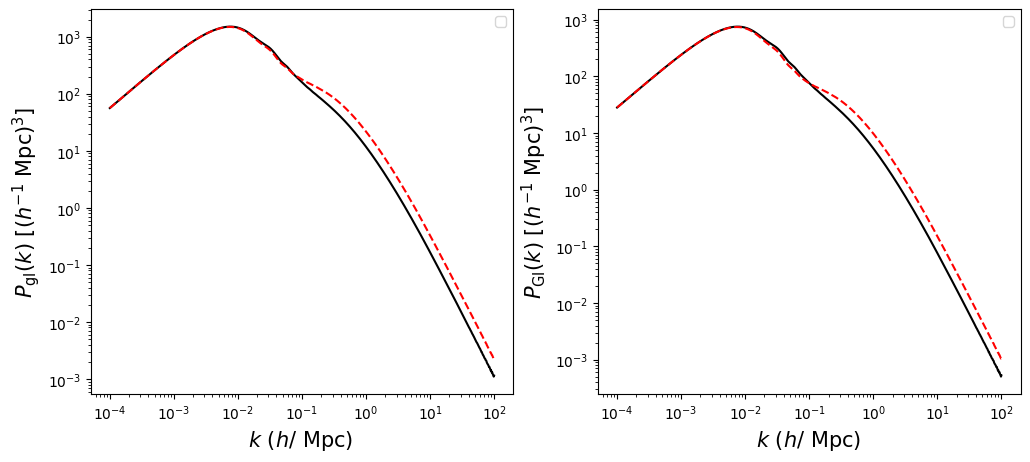

In [32]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(12,5),
                       gridspec_kw={'hspace': 0.4, 'wspace': .2, 'height_ratios': [2.5]}) 
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel(r'$P_{\rm gI}(k)\ [(h^{-1}\ \mathrm{Mpc})^{3}]$', size=15)
ax[1].set_ylabel(r'$P_{\rm GI}(k)\ [(h^{-1}\ \mathrm{Mpc})^{3}]$', size=15)
ax[0].set_xlabel(r'$k\ (h/\ \mathrm{Mpc})$ ', size=15)
ax[1].set_xlabel(r'$k\ (h/\ \mathrm{Mpc})$ ', size=15)

ax[0].loglog(k, -P_gI_NLA(k, 0), 'k')
ax[0].loglog(k, -P_gI(k, 0), 'r--')
ax[0].legend()

ax[1].loglog(k, -P_GI_NLA(k, 0), 'k')
ax[1].loglog(k, -P_GI(k, 0), 'r--')
ax[1].legend()

# plt.savefig('P_gI_fastpt.pdf')